In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import sys
from matplotlib.colors import Normalize
from matplotlib import cm
import math
from matplotlib.colors import LogNorm
import random

sys.path.append('/home/eduardo/PycharmProjects/treemap-analysis/code')

import Parser
import TemporalMetrics

# Same as the other document but with all datasets

In [2]:
%%time
technique_list = Parser.list_techniques()
df_tech_list = [pd.DataFrame()] * len(technique_list)

for dataset_id in Parser.list_datasets():
    for t, technique_id in enumerate(technique_list):
        history = Parser.parse_rectangles(technique_id, dataset_id)
        df_tech = pd.DataFrame()
        for i in range(1, len(history)):
            df_temp = TemporalMetrics.delta_vis(history[i - 1], history[i])
            df_temp = pd.merge(df_temp, TemporalMetrics.delta_data_by_area(history[i - 1], history[i]))
            df_tech = pd.concat([df_tech, df_temp])
        df_tech_list[t] = pd.concat([df_tech_list[t], df_tech])
        #print(len(df_tech_list[t]))

CPU times: user 22min 33s, sys: 4.23 s, total: 22min 37s
Wall time: 22min 48s


In [3]:
def cm2inch(value):
    return value/2.54

In [4]:
def make_colors(vals, cmap):
    norm = Normalize(vmin=vals.min(), vmax=vals.max())
    colors = [cm.ScalarMappable(norm=norm, cmap=cmap).to_rgba(val) for val in vals]
    return colors

APP
GIT
HIL
MOO
NAC
NEW
PBM
PBS
PBZ
SND
SPI
SQR
STR
CPU times: user 4min 59s, sys: 2.6 s, total: 5min 2s
Wall time: 5min


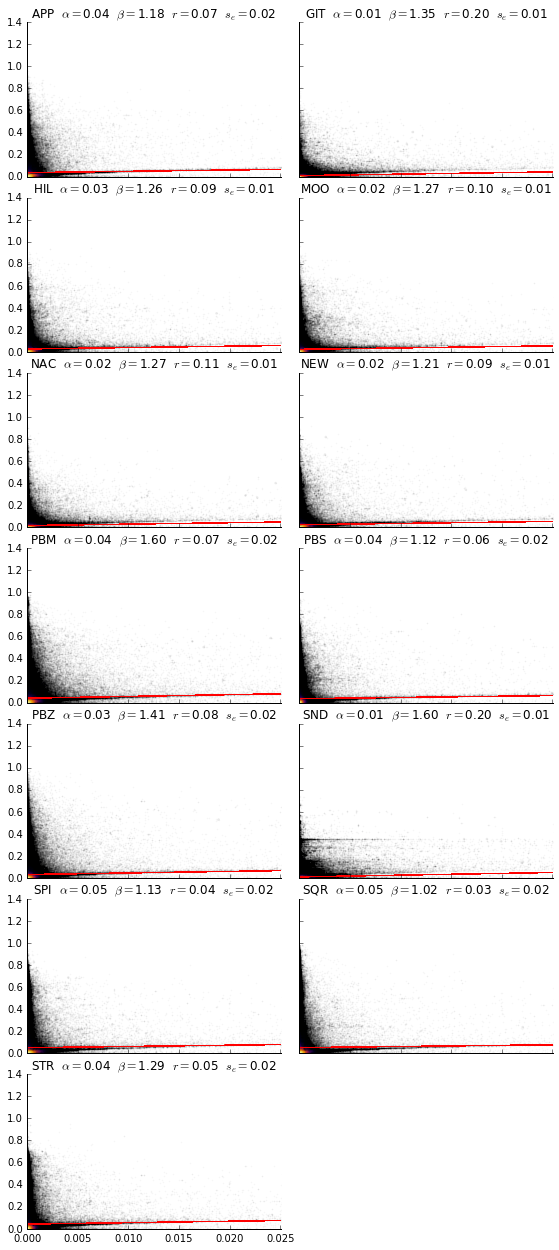

In [5]:
%%time
from matplotlib.colors import LogNorm
import random

technique_list = Parser.list_techniques()
nrow = 7
ncol = 2
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(20), cm2inch(2*22)))
fig.delaxes(axs[6, 1])
fig.tight_layout()
xlim = (df_tech_list[0]['delta_data']).quantile(0.999) # Remove the 0.01% outliers

for i, ax in enumerate(fig.axes):
    
    df = df_tech_list[i]
    # If there are too many points to handle, first we draw all of them in black (alpha),
    # then subsample the space, perform kde, and draw the colored subsample
    # over the original points
    if len(df) > 10000:
        matrix = df[['delta_data', 'delta_vis']].T.as_matrix()
        ax.scatter(matrix[0], matrix[1], color='k', s=1, alpha=.02)

        sample_size = 10000
        matrix = df[['delta_data', 'delta_vis']].sample(sample_size).T.as_matrix()
        dens = stats.gaussian_kde(matrix)
        dens_pt = dens(matrix)
        colours = make_colors(dens_pt, 'inferno')
        ax.scatter(matrix[0], matrix[1], color=colours, s=3, alpha=.05)
    else:        
        matrix = df[['delta_data', 'delta_vis']].T.as_matrix()
        dens = stats.gaussian_kde(matrix)
        dens_pt = dens(matrix)
        colours = make_colors(dens_pt, 'inferno')
        ax.scatter(matrix[0], matrix[1], color=colours, s=3, alpha=.25)
    
    # Compute linear regression and draw regression line 
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['delta_data'], df['delta_vis'])

    line = np.poly1d([slope, intercept])(df['delta_data'])
    ax.plot(df['delta_data'], line, 'r-', lw=.5)
    
    title = technique_list[i].upper()
    title += r"  $\alpha = $" + "{0:.2f}".format(intercept)
    title += r"  $\beta = $" + "{0:.2f}".format(slope)
    title += r"  $r = $" + "{0:.2f}".format(r_value)
    title += r"  $s_e = $" + "{0:.2f}".format(std_err)
    ax.set_title(title)

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    print(technique_list[i].upper())

    ax.tick_params(axis='x', which='both', top='off')
    ax.tick_params(axis='y', which='both', right='off')
    ax.set_xlim(xmin=0, xmax=xlim)
    ax.set_ylim(ymin=0)    
    
fig.savefig('all_scatter.png', format='png', dpi=800)

APP
GIT
HIL
MOO
NAC
NEW
PBM
PBS
PBZ
SND
SPI
SQR
STR
CPU times: user 4min 53s, sys: 2.17 s, total: 4min 55s
Wall time: 4min 54s


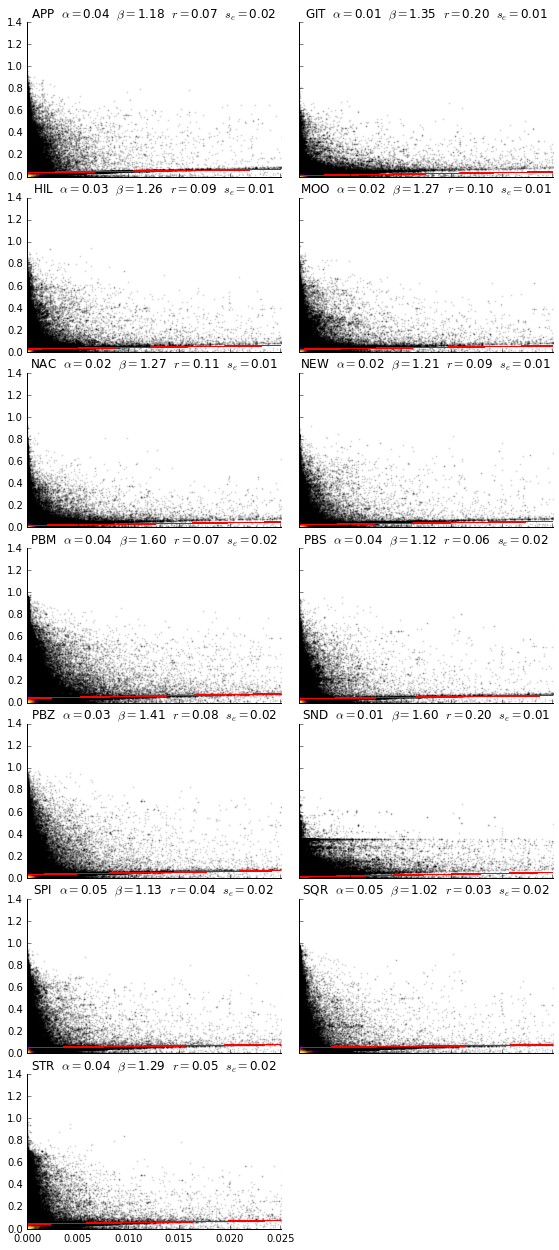

In [6]:
%%time
from matplotlib.colors import LogNorm
import random


technique_list = Parser.list_techniques()
nrow = 7
ncol = 2
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(20), cm2inch(2*22)))
fig.delaxes(axs[6, 1])
fig.tight_layout()
xlim = (df_tech_list[0]['delta_data']).quantile(0.999) # Remove the 0.01% outliers

for i, ax in enumerate(fig.axes):
    
    df = df_tech_list[i]
    # If there are too many points to handle, first we draw all of them in black (alpha),
    # then subsample the space, perform kde, and draw the colored subsample
    # over the original points
    if len(df) > 10000:
        matrix = df[['delta_data', 'delta_vis']].T.as_matrix()
        ax.scatter(matrix[0], matrix[1], color='k', s=1, alpha=.1)

        sample_size = 10000
        matrix = df[['delta_data', 'delta_vis']].sample(sample_size).T.as_matrix()
        dens = stats.gaussian_kde(matrix)
        dens_pt = dens(matrix)
        colours = make_colors(dens_pt, 'inferno')
        ax.scatter(matrix[0], matrix[1], color=colours, s=1, alpha=.05)
    else:        
        matrix = df[['delta_data', 'delta_vis']].T.as_matrix()
        dens = stats.gaussian_kde(matrix)
        dens_pt = dens(matrix)
        colours = make_colors(dens_pt, 'inferno')
        ax.scatter(matrix[0], matrix[1], color=colours, s=3, alpha=.25)
    
    # Compute linear regression and draw regression line 
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['delta_data'], df['delta_vis'])

    line = np.poly1d([slope, intercept])(df['delta_data'])
    ax.plot(df['delta_data'], line, 'r-', lw=.5)
    
    title = technique_list[i].upper()
    title += r"  $\alpha = $" + "{0:.2f}".format(intercept)
    title += r"  $\beta = $" + "{0:.2f}".format(slope)
    title += r"  $r = $" + "{0:.2f}".format(r_value)
    title += r"  $s_e = $" + "{0:.2f}".format(std_err)
    ax.set_title(title)
    
    print(technique_list[i].upper())

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(axis='x', which='both', top='off')
    ax.tick_params(axis='y', which='both', right='off')
    ax.set_xlim(xmin=0, xmax=xlim)
    ax.set_ylim(ymin=0)    
    
fig.savefig('asfall_scatter.png', format='png', dpi=800)

APP
GIT
HIL
MOO
NAC
NEW
PBM
PBS
PBZ
SND
SPI
SQR
STR
CPU times: user 5min 3s, sys: 1 s, total: 5min 4s
Wall time: 5min 3s


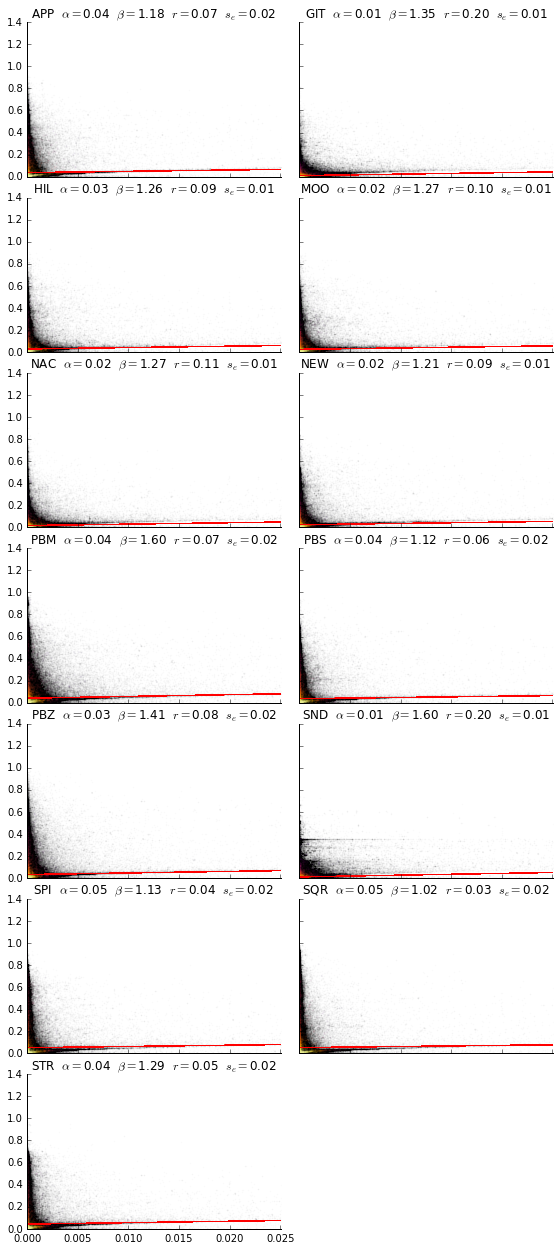

In [10]:
%%time
from matplotlib.colors import LogNorm
import random


def make_colors_log(vals, cmap):
    norm = LogNorm(vmin=vals.min(), vmax=vals.max())
    colors = [cm.ScalarMappable(norm=norm, cmap=cmap).to_rgba(val) for val in vals]
    return colors

technique_list = Parser.list_techniques()
nrow = 7
ncol = 2
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(20), cm2inch(2*22)))
fig.delaxes(axs[6, 1])
fig.tight_layout()
xlim = (df_tech_list[0]['delta_data']).quantile(0.999) # Remove the 0.01% outliers

for i, ax in enumerate(fig.axes):
    
    df = df_tech_list[i]
    # If there are too many points to handle, first we draw all of them in black (alpha),
    # then subsample the space, perform kde, and draw the colored subsample
    # over the original points
    matrix = df[['delta_data', 'delta_vis']].T.as_matrix()
    ax.scatter(matrix[0], matrix[1], color='k', s=1, alpha=.01)

    sample_size = 10000
    matrix = df[['delta_data', 'delta_vis']].sample(sample_size).T.as_matrix()
    dens = stats.gaussian_kde(matrix)
    dens_pt = dens(matrix)
    colours = make_colors_log(dens_pt, 'inferno')
    ax.scatter(matrix[0], matrix[1], color=colours, s=1, alpha=.05)

    
    # Compute linear regression and draw regression line 
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['delta_data'], df['delta_vis'])

    line = np.poly1d([slope, intercept])(df['delta_data'])
    ax.plot(df['delta_data'], line, 'r-', lw=.5)
    
    title = technique_list[i].upper()
    title += r"  $\alpha = $" + "{0:.2f}".format(intercept)
    title += r"  $\beta = $" + "{0:.2f}".format(slope)
    title += r"  $r = $" + "{0:.2f}".format(r_value)
    title += r"  $s_e = $" + "{0:.2f}".format(std_err)
    ax.set_title(title)
    
    print(technique_list[i].upper())

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(axis='x', which='both', top='off')
    ax.tick_params(axis='y', which='both', right='off')
    ax.set_xlim(xmin=0, xmax=xlim)
    ax.set_ylim(ymin=0)    
    
fig.savefig('2all_scatter.png', format='png', dpi=800)

APP
GIT
HIL
MOO
NAC
NEW
PBM
PBS
PBZ
SND
SPI
SQR
STR
CPU times: user 7min, sys: 1.36 s, total: 7min 1s
Wall time: 7min 4s


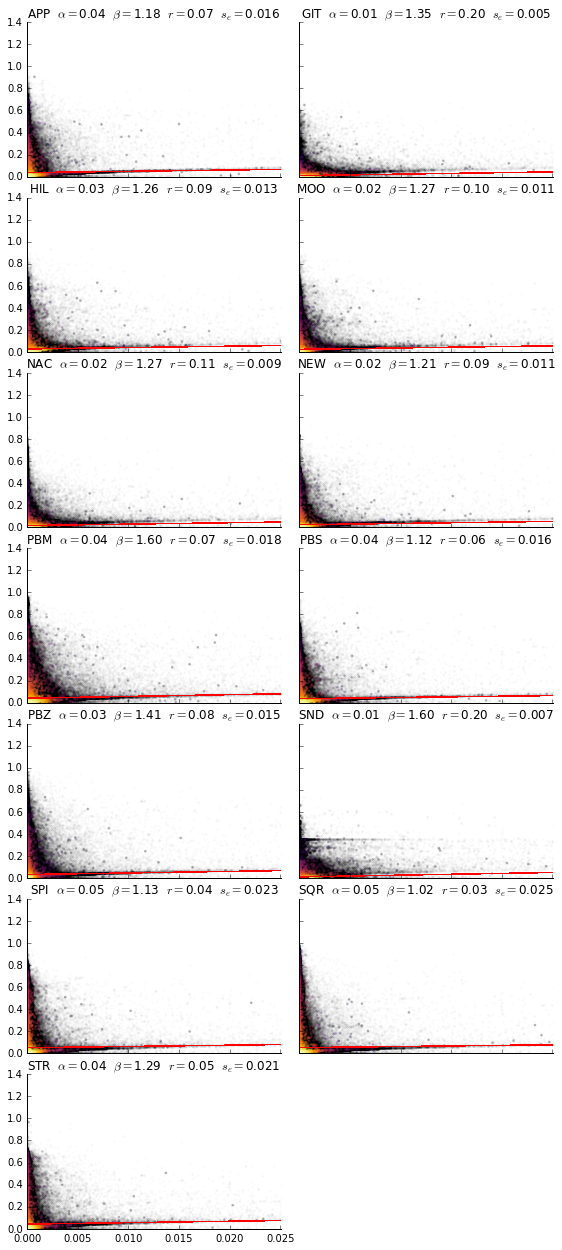

In [13]:
%%time
from matplotlib.colors import LogNorm
import random


def make_colors_log(vals, cmap):
    norm = LogNorm(vmin=vals.min(), vmax=vals.max())
    colors = [cm.ScalarMappable(norm=norm, cmap=cmap).to_rgba(val) for val in vals]
    return colors

technique_list = Parser.list_techniques()
nrow = 7
ncol = 2
fig, axs = plt.subplots(nrow, ncol, sharex=True, sharey=True, figsize=(cm2inch(20), cm2inch(2*22)))
fig.delaxes(axs[6, 1])
fig.tight_layout()
xlim = (df_tech_list[0]['delta_data']).quantile(0.999) # Remove the 0.01% outliers

for i, ax in enumerate(fig.axes):
    
    df = df_tech_list[i]
    # If there are too many points to handle, first we draw all of them in black (alpha),
    # then subsample the space, perform kde, and draw the colored subsample
    # over the original points
    matrix = df[['delta_data', 'delta_vis']].T.as_matrix()
    ax.scatter(matrix[0], matrix[1], color='k', s=3, alpha=.01)

    sample_size = 10000
    matrix = df[['delta_data', 'delta_vis']].sample(sample_size).T.as_matrix()
    dens = stats.gaussian_kde(matrix)
    dens_pt = dens(matrix)
    colours = make_colors_log(dens_pt, 'inferno')
    ax.scatter(matrix[0], matrix[1], color=colours, s=3, alpha=.2)

    
    # Compute linear regression and draw regression line 
    slope, intercept, r_value, p_value, std_err = stats.linregress(df['delta_data'], df['delta_vis'])

    line = np.poly1d([slope, intercept])(df['delta_data'])
    ax.plot(df['delta_data'], line, 'r-', lw=.5)
    
    title = technique_list[i].upper()
    title += r"  $\alpha = $" + "{0:.2f}".format(intercept)
    title += r"  $\beta = $" + "{0:.2f}".format(slope)
    title += r"  $r = $" + "{0:.2f}".format(r_value)
    title += r"  $s_e = $" + "{0:.3f}".format(std_err)
    ax.set_title(title)
    
    print(technique_list[i].upper())

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.tick_params(axis='x', which='both', top='off')
    ax.tick_params(axis='y', which='both', right='off')
    ax.set_xlim(xmin=0, xmax=xlim)
    ax.set_ylim(ymin=0)    
    
fig.savefig('2all_scatter.png', format='png', dpi=800)

In [7]:
# import mpl_scatter_density
# from astropy.visualization import LogStretch
# from astropy.visualization.mpl_normalize import ImageNormalize
# norm = ImageNormalize(vmin=1, vmax=3000, stretch=LogStretch())

# xlim = (df_tech_list[0]['delta_data']).quantile(0.99) # Remove the 0.1% outliers
# plt.rcParams['image.cmap'] = 'jet'

# nrow = 4
# ncol = 4
# #fig, axs = plt.subplots(nrow, ncol, , , projection='scatter_density')
# fig = plt.figure(figsize=(cm2inch(2*16.5), cm2inch(2*18)))
# for i in range(len(technique_list)):
#     df = df_tech_list[i]

#     ax = fig.add_subplot(nrow, ncol, i+1, projection='scatter_density')        
#     ax.set_title(technique_list[i])
    
#     ax.scatter_density(df['delta_data'].values, df['delta_vis'].values, norm=norm)

#     ax.set_xlim([-0.05*xlim, xlim])
#     ax.set_ylim([-0.05, 1])
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
    
#     locator = plt.MaxNLocator(nbins=4) # with 3 bins you will have 4 ticks
#     ax.xaxis.set_major_locator(locator)


# plt.tight_layout()

# plt.show()
# fig.savefig('kde_all_jet.png')
# from IPython.display import Image
# Image(filename='kde_all_jet.png') 

In [8]:
# import mpl_scatter_density
# from astropy.visualization import LogStretch
# from astropy.visualization.mpl_normalize import ImageNormalize
# norm = ImageNormalize(vmin=1, vmax=3000, stretch=LogStretch())

# xlim = (df_tech_list[0]['delta_data']).quantile(0.99) # Remove the 0.1% outliers
# plt.rcParams['image.cmap'] = 'inferno'

# nrow = 4
# ncol = 4
# #fig, axs = plt.subplots(nrow, ncol, , , projection='scatter_density')
# fig = plt.figure(figsize=(cm2inch(2*16.5), cm2inch(2*18)))
# for i in range(len(technique_list)):
#     df = df_tech_list[i]

#     ax = fig.add_subplot(nrow, ncol, i+1, projection='scatter_density')        
#     ax.set_title(technique_list[i])
    
#     ax.scatter_density(df['delta_data'].values, df['delta_vis'].values, norm=norm)

#     ax.set_xlim([-0.05*xlim, xlim])
#     ax.set_ylim([-0.05, 1])
#     ax.spines['top'].set_visible(False)
#     ax.spines['right'].set_visible(False)
#     ax.spines['bottom'].set_visible(False)
#     ax.spines['left'].set_visible(False)
    
#     locator = plt.MaxNLocator(nbins=4) # with 3 bins you will have 4 ticks
#     ax.xaxis.set_major_locator(locator)


# plt.tight_layout()

# plt.show()
# fig.savefig('kde_all_inferno.png')
# from IPython.display import Image
# Image(filename='kde_all_inferno.png') 